## CVESearch from Ares python library
Ares package has CVESearch, which can fetch data related to CVEs and CVEs themselves providing search word or cveid etc.,

In [6]:
from ares import CVESearch
import json

In [3]:
cve = CVESearch()
cve.browse('cisco')

{'product': ['-871_integrated_services_router',
  '10008_router',
  '1000v',
  '1000v_virtual_ethernet_module_\\(vem\\)',
  '1100',
  '1100-4p',
  '1100-8p',
  '1100-8p_firmware',
  '1100_integrated_services_r',
  '1100_integrated_services_router',
  '1100_terminal_services_gateways',
  '1101-4p',
  '1109-2p',
  '1109-4p',
  '1111-4pwe',
  '1111-8plteeawb',
  '1111-8pwb',
  '1111x-8p',
  '1113-8plteeawe',
  '1113-8pmwe',
  '1113-8pwe',
  '1116-4plteeawe',
  '1116-4pwe',
  '1117-4plteeawe',
  '1117-4pmlteeawe',
  '1117-4pmwe',
  '1117-4pwe',
  '1120',
  '1120_connected_grid_router',
  '1120_firmware',
  '1160',
  '1160_firmware',
  '12000_router',
  '1240',
  '1240_connected_grid_router',
  '15454-m-wse-k9',
  '15454-m-wse-k9_firmware',
  '1801_integrated_service_router',
  '1802_integrated_service_router',
  '1803_integrated_service_router',
  '1811_integrated_service_router',
  '1812_integrated_service_router',
  '1841_integrated_service_router',
  '1861_integrated_service_router',
  

In [4]:
cve.id('CVE-2014-0160')

{'Modified': '2020-07-28T17:11:00',
 'Published': '2014-04-07T22:55:00',
 'access': {'authentication': 'NONE',
  'complexity': 'LOW',
  'vector': 'NETWORK'},
 'assigner': 'cve@mitre.org',
 'capec': [{'id': '46',
   'name': 'Overflow Variables and Tags',
   'prerequisites': 'The target program consumes user-controllable data in the form of tags or variables. The target program does not perform sufficient boundary checking.',
   'related_weakness': ['118', '119', '120', '20', '680', '697', '733', '74'],
   'solutions': 'Use a language or compiler that performs automatic bounds checking. Use an abstraction library to abstract away risky APIs. Not a complete solution. Compiler-based canary mechanisms such as StackGuard, ProPolice and the Microsoft Visual Studio /GS flag. Unless this provides automatic bounds checking, it is not a complete solution. Use OS-level preventative functionality. Not a complete solution. Do not trust input data from user. Validate all user input.',
   'summary': '

## Downloading XML file from CVE downlaods and converting to CSV
The CVRF format contains limited info about all the CVEs available in the DB

In [61]:
data['cvrfdoc']['Vulnerability'][0].keys

odict_keys(['@Ordinal', '@xmlns', 'Title', 'Notes', 'CVE', 'References'])

In [64]:
data['cvrfdoc']['Vulnerability'][0]['CVE']

'CVE-1999-0001'

In [126]:
data['cvrfdoc']['Vulnerability'][2820]['Notes']['Note']

OrderedDict([('@Ordinal', '1'),
             ('@Type', 'Description'),
             ('#text',
              '** RESERVED ** This candidate has been reserved by an organization or individual that will use it when announcing a new security problem.  When the candidate has been publicized, the details for this candidate will be provided.')])

In [124]:
data['cvrfdoc']['Vulnerability'][2820]['Notes']['Note']['#text']

'** RESERVED ** This candidate has been reserved by an organization or individual that will use it when announcing a new security problem.  When the candidate has been publicized, the details for this candidate will be provided.'

In [132]:
data['cvrfdoc']['Vulnerability'][2820]['Notes']['Note']['@Type']

'Description'

In [85]:
data['cvrfdoc']['Vulnerability'][999]['Notes']['Note'][0]['#text']

'SpectroSERVER in Cabletron Spectrum Enterprise Manager 5.0 installs a directory tree with insecure permissions, which allows local users to replace a privileged executable (processd) with a Trojan horse, facilitating a root or Administrator compromise.'

## CVE-allitems.csv

In [141]:
df = pd.read_csv('cve-allitems.csv', index_col=0)
df

,cve_id,Description,Published,Modified
0,CVE-1999-0001,ip_input.c in BSD-derived TCP/IP implementatio...,2000-02-04,2005-12-16
1,CVE-1999-0002,Buffer overflow in NFS mountd gives root acces...,1999-09-29,2005-11-02
2,CVE-1999-0003,Execute commands as root via buffer overflow i...,1999-09-29,2005-11-02
3,CVE-1999-0004,"MIME buffer overflow in email clients, e.g. So...",2000-02-04,2018-10-12
4,CVE-1999-0005,Arbitrary command execution via IMAP buffer ov...,1999-09-29,2005-11-02
...,...,...,...,...
228409,CVE-2022-24974,NaN,NaN,2022-02-11
228410,CVE-2022-24975,The --mirror documentation for Git through 2.3...,2022-02-11,2022-02-11
228411,CVE-2022-24976,"Atheme IRC Services before 7.2.12, when used i...",2022-02-13,2022-02-13
228412,CVE-2022-24977,ImpressCMS before 1.4.2 allows unauthenticated...,2022-02-13,2022-02-13


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228414 entries, 0 to 228413
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   cve_id       228414 non-null  object
 1   Description  180692 non-null  object
 2   Published    181840 non-null  object
 3   Modified     216618 non-null  object
dtypes: object(4)
memory usage: 8.7+ MB


In [143]:
len(df)

228414

## Data Cleaning

In [144]:
df.isna().sum()

cve_id             0
Description    47722
Published      46574
Modified       11796
dtype: int64

In [147]:
df[~df.Description.isna()].isna().sum()

cve_id             0
Description        0
Published        119
Modified       10529
dtype: int64

In [148]:
len(df[~df.Description.isna()])

180692

In [158]:
df_modified = df[~df.Description.isna()].copy()
df_modified

,cve_id,Description,Published,Modified
0,CVE-1999-0001,ip_input.c in BSD-derived TCP/IP implementatio...,2000-02-04,2005-12-16
1,CVE-1999-0002,Buffer overflow in NFS mountd gives root acces...,1999-09-29,2005-11-02
2,CVE-1999-0003,Execute commands as root via buffer overflow i...,1999-09-29,2005-11-02
3,CVE-1999-0004,"MIME buffer overflow in email clients, e.g. So...",2000-02-04,2018-10-12
4,CVE-1999-0005,Arbitrary command execution via IMAP buffer ov...,1999-09-29,2005-11-02
...,...,...,...,...
228396,CVE-2022-24961,"In Portainer Agent before 2.11.1, an API serve...",2022-02-10,2022-02-10
228403,CVE-2022-24968,"In Mellium mellium.im/xmpp through 0.21.0, an ...",2022-02-11,2022-02-11
228410,CVE-2022-24975,The --mirror documentation for Git through 2.3...,2022-02-11,2022-02-11
228411,CVE-2022-24976,"Atheme IRC Services before 7.2.12, when used i...",2022-02-13,2022-02-13


## Finding the CVEs with the keywords - 'Hardware', 'Firmware', 'Chip'

In [155]:
len([i for i in df_modified.Description if 'hardware' in i.lower()])

365

In [156]:
len([i for i in df_modified.Description if 'firmware' in i.lower()])

3228

In [157]:
len([i for i in df_modified.Description if 'chip' in i.lower()])

313

In [170]:
df_labeled = df_modified.copy()

for i in df_labeled.Description:
    if 'hardware' in i.lower():
        df_labeled.loc[df_labeled.Description==i, 'Label'] = 0

In [171]:
#df_labeled = df_modified.copy()

for i in df_labeled.Description:
    if 'firmware' in i.lower():
        df_labeled.loc[df_labeled.Description==i, 'Label'] = 1

In [172]:
#df_labeled = df_modified.copy()

for i in df_labeled.Description:
    if 'chip' in i.lower():
        df_labeled.loc[df_labeled.Description==i, 'Label'] = 2

In [173]:
len(df_labeled[~df_labeled.Label.isna()])

3839

In [190]:
df_labeled = df_labeled[~df_labeled.Label.isna()]

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
#!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, MaxPool2D, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.layers import GlobalAvgPool1D, GlobalMaxPool1D
from sklearn.model_selection import train_test_split
#!pip install tensorflow-addons
import tensorflow_addons as tfa

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\karth\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
http

In [191]:
df_final = df_labeled[['Description', 'Label','cve_id']].copy().set_index('cve_id')
df_final

,Description,Label
cve_id,,
CVE-1999-1489,Buffer overflow in TestChip function in XFree8...,2.0
CVE-1999-1524,FlowPoint DSL router firmware versions prior t...,1.0
CVE-1999-1548,Cabletron SmartSwitch Router (SSR) 8000 firmwa...,1.0
CVE-2000-1062,Buffer overflow in the FTP service in HP JetDi...,1.0
CVE-2000-1063,Buffer overflow in the Telnet service in HP Je...,1.0
...,...,...
CVE-2022-23968,Xerox VersaLink devices on specific versions o...,1.0
CVE-2022-23994,An Improper access control vulnerability in St...,1.0
CVE-2022-23995,Unprotected component vulnerability in StBedti...,1.0


In [195]:
class prepare_text_data:
    def __init__(self, data, text_column):
        self.vocabulary = None
        self.data = data
        self.text_column = text_column
    
    def clean_text(self, text, stemming='PorterStemmer', rm_stopwords=True):
        """Standization / cleaning the text"""
        #Removing punctuation
        text = ''.join((c for c in text if c not in string.punctuation))
        #Convert to Lower case
        text = text.lower()
        #Remove special characters
        text = unidecode.unidecode(text)
        #Removing stopwords (commonly spoken words) and apply stemming technique (for example: studying and studies are same words that is study)
        if stemming == 'PorterStemmer':
            stem = PorterStemmer()
            if rm_stopwords:
                text = "".join((stem.stem(word) for word in text if word not in set(stopwords.words('english'))))
            else:
                text = "".join((stem.stem(word) for word in text))
        elif stemming == 'Lemmatizer':
            stem = WordNetLemmatizer()
            if rm_stopwords:
                text = "".join((stem.lemmatize(word) for word in text if word not in set(stopwords.words('english'))))
            else:
                text = "".join((stem.lemmatize(word) for word in text))

        return text
    
    def clean_data(self, stemming='PorterStemmer', rm_stopwords=True):
        """recieves the dataframe of text column and maps it to the clean_text function to clean text by text"""
        self.data[self.text_column] = self.data[self.text_column].map(lambda x: self.clean_text(x, stemming, rm_stopwords))
        
        return self.data[self.text_column]
        
        
    def get_vocabulary(self):
        return self.vocabulary
    
    def text_vectorization(self, 
                            max_tokens=20000,
                            output_sequence_length=500,
                            ngrams = 1,
                           output_mode = 'int'
                          ):
        """Text vectorization using keras"""
        text_vectorization = TextVectorization(max_tokens = max_tokens, 
                                               ngrams=ngrams, 
                                               output_sequence_length=output_sequence_length, 
                                               output_mode=output_mode)
        text_vectorization.adapt(self.data[[self.text_column]].to_numpy())
        """Vocabulary stored as a object variable"""
        self.vocabulary = text_vectorization.get_vocabulary()
        
        return text_vectorization(self.data[[self.text_column]].to_numpy()).numpy()

In [199]:
#nltk.download()
o = prepare_text_data(df_final, 'Description')
df_final['Description'] = o.clean_data('Lemmatizer')

X = o.text_vectorization(max_tokens=20000, output_sequence_length=500, ngrams=1)
# transform target to one-hot encoded data
y = tf.keras.utils.to_categorical(df_final[['Label']], num_classes=3)
vocabulary = o.get_vocabulary()
vocabulary

['',
 '[UNK]',
 'n',
 'he',
 'frwre',
 'f',
 'cker',
 'h',
 'llw',
 'wh',
 'vern',
 'e',
 'fr',
 'evce',
 'vulnerbl',
 'cn',
 'ree',
 'v',
 'r',
 'ue',
 'b',
 'befre',
 'cce',
 'uer',
 're',
 'prr',
 'rbrr',
 'whch',
 'ervce',
 'erler',
 'reque',
 'p',
 'be',
 'execue',
 'web',
 'ce',
 'prvlege',
 'w',
 'cue',
 'ung',
 'buffer',
 'en',
 'enl',
 'cul',
 'verflw',
 'erver',
 'll',
 'hp',
 'nfrn',
 'ffece',
 'crfe',
 'ere',
 'uhencn',
 'ck',
 'lcl',
 'cre',
 'preer',
 'fle',
 'nerfce',
 'pwr',
 'funcn',
 'newrk',
 'cvere',
 'ke',
 'ex',
 'uhence',
 'vecr',
 'ruer',
 'hrwre',
 'unpecfe',
 'cc',
 'ble',
 'ne',
 'x',
 'ngeen',
 'hrugh',
 'vulnerble',
 'u',
 'l',
 'fwre',
 'nr',
 '2',
 'lnk',
 'pr',
 'cnn',
 'bn',
 'ql',
 'her',
 'k',
 'enble',
 'unuhence',
 'when',
 'relee',
 'er',
 'pcke',
 'expl',
 'pruc',
 'cnfgurn',
 'c',
 'prper',
 'runnng',
 'nprgn',
 'el',
 'le',
 'penll',
 'njecn',
 '1',
 'cnrl',
 'cluer',
 'ge',
 'execun',
 'bp',
 'upe',
 'ule',
 'pern',
 'cer',
 'vlue',
 'nelr',
 '

In [208]:
y.shape

(3839, 3)

### Splitting the Data

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    stratify = y, 
                                                    shuffle=True,
                                                    random_state=42
                                                   )

## Model

In [223]:
def model(input_dim,
          output_dim,
          input_length,
          num_units = 256,
          num_lstm_layers = 1,
          dropout_rate = 0.4,
          recurrent_dropout = 0,
          pooling = False,
          pooling_type = 'global_avg',
          num_hidden_layers = 0,
          num_dense_units = 64,
          dense_dropout = 0.2,
          optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
         ):
    
    model = Sequential()
    
    #Embedding layer to embed the text vectors as an encoded data so, it can be input for the model
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length)) 
    
    #LSTM block
    for i in range(num_lstm_layers):
          model.add(LSTM(num_units, dropout=dropout_rate, 
                         #activation='tanh', 
                     #recurrent_activation='sigmoid',
                     recurrent_dropout=recurrent_dropout, 
                     #use_bias=True, unroll=False,
                     return_sequences=True))
    
    #Pooling layers to reduce dimentions and so, to reduce parameters
    if pooling:
        if pooling_type=='global_avg':
            model.add(GlobalAvgPool1D())
        if pooling_type=='global_max':
            model.add(GlobalMaxPool1D())
    else:
    #Flattening the 2D array to 1D before passing to Fully-Connected network or to the output layer
      model.add(Flatten())
    
    #Fully-Connected layers
    for i in range(num_hidden_layers):
        model.add(Dense(num_dense_units, activation='relu'))
        model.add(Dropout(dense_dropout))
    model.add(Dense(3, activation="softmax")) #Using two nodes as ouput

    #Compiling the model (for backpropogation)
    model.compile(
        loss = tf.keras.metrics.categorical_crossentropy,
        optimizer = optimizer,
        metrics = ["accuracy"] #, tfa.metrics.F1Score(2)
    )
    
    return model

input_dim = len(vocabulary) #Size of the vocabulary i.e. maximum integer index + 1
#df['text'].apply(lambda x: len(x)).max()+1
output_dim = 10 #Dimention of the dense embedding layer

input_length = X_train.shape[-1] #number of columns after vectorization should be provided here

tf.keras.backend.clear_session()

model = model(input_dim=input_dim, 
              output_dim=output_dim, 
              num_lstm_layers=1,
              input_length=input_length, 
              pooling=False,
              num_hidden_layers=1)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 10)           114530    
                                                                 
 lstm (LSTM)                 (None, 500, 256)          273408    
                                                                 
 flatten (Flatten)           (None, 128000)            0         
                                                                 
 dense (Dense)               (None, 64)                8192064   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 8,580,197
Trainable params: 8,580,197
Non-

In [224]:
y_train.shape

(3071, 3)

### Training and Validation

In [237]:
EPOCHS = 10
BATCH_SIZE = 64

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="lstm.h5",
                                            save_best_only=True,
                                            monitor='val_loss')
tf.keras.backend.clear_session()

history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2,
                    shuffle=True, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    verbose=1,
                    callbacks=[checkpoint]
                   )

Epoch 1/10
39/39 [==============================] - 4s 100ms/step - loss: 0.3804 - accuracy: 0.9157 - val_loss: 0.2764 - val_accuracy: 0.9154
Epoch 2/10
39/39 [==============================] - 4s 101ms/step - loss: 0.1957 - accuracy: 0.9218 - val_loss: 0.2710 - val_accuracy: 0.8748
Epoch 3/10
39/39 [==============================] - 3s 75ms/step - loss: 0.1792 - accuracy: 0.9084 - val_loss: 0.2789 - val_accuracy: 0.8764
Epoch 4/10
39/39 [==============================] - 4s 99ms/step - loss: 0.1557 - accuracy: 0.9178 - val_loss: 0.2579 - val_accuracy: 0.9073
Epoch 5/10
39/39 [==============================] - 4s 94ms/step - loss: 0.1423 - accuracy: 0.9267 - val_loss: 0.2437 - val_accuracy: 0.8797
Epoch 6/10
39/39 [==============================] - 3s 75ms/step - loss: 0.1318 - accuracy: 0.9239 - val_loss: 0.2482 - val_accuracy: 0.8846
Epoch 7/10
39/39 [==============================] - 3s 76ms/step - loss: 0.1127 - accuracy: 0.9336 - val_loss: 0.2865 - val_accuracy: 0.8764
Epoch 8/10


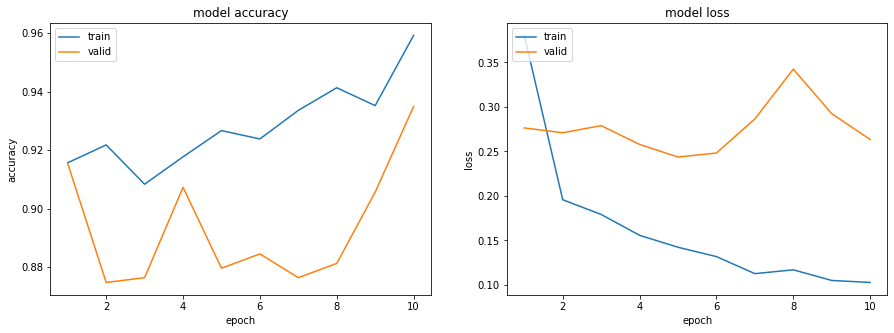

In [238]:
def plot_train_val_accuracy_n_loss(history, Range=2.0):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    for ax, j in zip(axes, ['accuracy', 'loss']):
        # summarize history for accuracy and loss
        ax.plot(range(1, len(history.history[j]) + 1), history.history[j])
        ax.plot(range(1, len(history.history['val_'+j]) + 1), history.history['val_'+j])
        ax.set_title("model "+j)
        ax.set_ylabel(j)
        ax.set_xlabel('epoch')
        ax.set_xticks(np.arange(2,EPOCHS+1, Range))
        ax.legend(['train', 'valid'], loc='upper left')
    plt.show()
        
plot_train_val_accuracy_n_loss(history)

### Testing

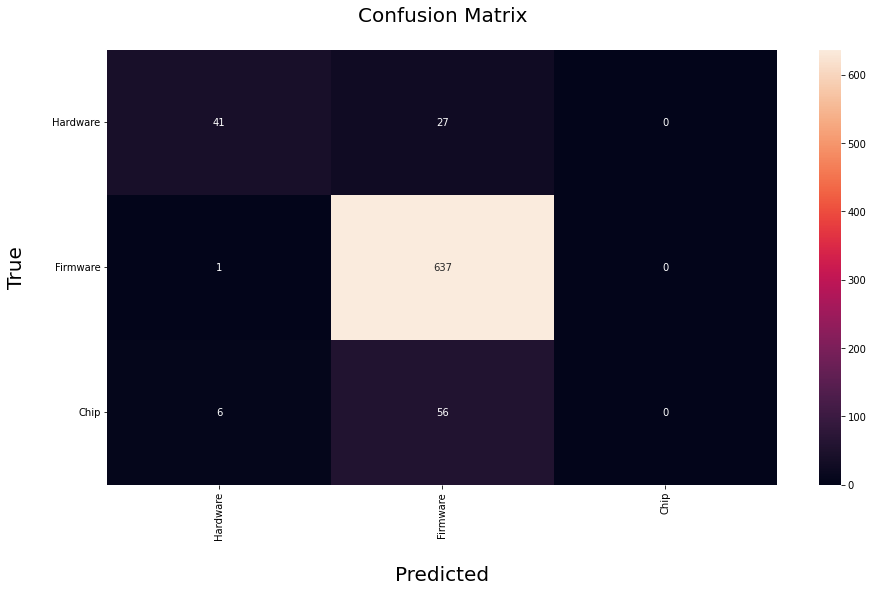

Test Accuracy:  0.8828125
Test F1-Score:  0.8419336562388908


In [239]:
model = tf.keras.models.load_model("lstm.h5")

# Changinge one hot encoded data back to labels
y_pred = np.argmax(model.predict(X_test), axis=1) 
y_true = np.argmax(y_test, axis=1)

# Class Labels
class_names = ['Hardware', 'Firmware', 'Chip']

# Plotting Confusion matrix
cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm, class_names=class_names):
    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(15, 8))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('\nPredicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(class_names, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True\n', fontsize=20)
    ax.yaxis.set_ticklabels(class_names, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Confusion Matrix\n', fontsize=20)
    plt.show()

plot_confusion_matrix(cm)

print("Test Accuracy: ",accuracy_score(y_true, y_pred))
#Getting zero if average is not weighted as some calculations leaading to non-integers.
print("Test F1-Score: ",f1_score(y_true, y_pred, average='weighted')) 